<center>

# <font color='#00BFFF'>**Star Classification Project**</font>

</center>


<center>

### <font color='#00BFFF'>**Fall 2024**</font>

</center>


# Henry Jeff Marcel

### <font color='#FF6347'>**Project Description:**</font>  

You have been provided with a dataset that contains information related to stars. Your task is to follow the data science workflow and perform the following procedures: 

- Apply the preprocessing step, if applicable.
- Conduct a thorough Exploratory Data Analysis (EDA).
- Build a model that can classify the star type to the best of your ability.
- Use performance metrics to evaluate your model.
- Answer the following questions: 
    - What are some challenges you might encounter in this project? 
    - What else you can do to improve your work and model? 



### <font color='#FF6347'>**Dataset Description:**</font>  

This is a dataset consisting of several features of stars.

Some of them are:

- Absolute Temperature (in K)
- Relative Luminosity (L/Lo)
- Relative Radius (R/Ro)
- Absolute Magnitude (Mv)
- Star Color (white,Red,Blue,Yellow,yellow-orange etc)
- Spectral Class (O,B,A,F,G,K,,M)
- Star category **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)**
- Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)
- Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

In [37]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
# import category_encoders as ce
from sklearn.metrics import accuracy_score
from sklearn import tree
# import graphviz 

# Step 1 : Basic Analysis

In [38]:
# import data
star = pd.read_csv("C:\\Users\\hjmarcel\\OneDrive - Gestion immobiliere BTB Inc\\Bureau\\Machine Learning\\Assignment\\Stars.csv")

In [39]:
star.head(50)

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.17000,16.120,0,Brown Dwarf,Red,M
1,3042,0.000500,0.15420,16.600,0,Brown Dwarf,Red,M
2,2600,0.000300,0.10200,18.700,0,Brown Dwarf,Red,M
3,2800,0.000200,0.16000,16.650,0,Brown Dwarf,Red,M
4,1939,0.000138,0.10300,20.060,0,Brown Dwarf,Red,M
5,2840,0.000650,0.11000,16.980,0,Brown Dwarf,Red,M
6,2637,0.000730,0.12700,17.220,0,Brown Dwarf,Red,M
7,2600,0.000400,0.09600,17.400,0,Brown Dwarf,Red,M
8,2650,0.000690,0.11000,17.450,0,Brown Dwarf,Red,M
9,2700,0.000180,0.13000,16.050,0,Brown Dwarf,Red,M


In [40]:
star.shape

(240, 8)

In [41]:
star.columns

Index(['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)',
       'Absolute magnitude (Mv)', 'Star type', 'Star category', 'Star color',
       'Spectral Class'],
      dtype='object')

In [42]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


## Observation:
- This is small dataset with 240 rows and 8 columns
- There are no missing values. This is great as it reduces the need for imputation.
- Categorical columns (Star category, Star color, and Spectral Class) Will need to be encodd for the machine learning model.
- The column names are descriptive and clear.
- <font color='#FF6347'>**The Star type column represents the target variable for classification, encoded numerically**</font>  

# Step 2 : Data Cleaning

In [43]:
# Dupplicate Checks

duplicates = star.duplicated()

any_duplicates = duplicates.any()
print(f"Are there any duplicates? {any_duplicates}")

Are there any duplicates? False


In [44]:
#Veryfying the nulls

missing = pd.concat([star.isnull().sum(), 100 * star.isnull().mean()], axis=1)
missing.columns=['MissingCount', 'MissingPercentage']
missing.sort_values(by='MissingCount', inplace=True)
missing

,MissingCount,MissingPercentage
Temperature (K),0,0.0
Luminosity (L/Lo),0,0.0
Radius (R/Ro),0,0.0
Absolute magnitude (Mv),0,0.0
Star type,0,0.0
Star category,0,0.0
Star color,0,0.0
Spectral Class,0,0.0


In [45]:
# Consistency check

print("Unique values in 'Star category':", star['Star category'].unique())
print("Unique values in 'Star color':", star['Star color'].unique())
print("Unique values in 'Spectral Class':", star['Spectral Class'].unique())


Unique values in 'Star category': ['Brown Dwarf' 'Red Dwarf' 'White Dwarf' 'Main Sequence' 'Supergiant'
 'Hypergiant']
Unique values in 'Star color': ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'Blue ' 'yellowish' 'Yellowish'
 'Orange-Red' 'Blue white ' 'Blue-White']
Unique values in 'Spectral Class': ['M' 'B' 'A' 'F' 'O' 'K' 'G']


In [46]:
# Standardize 'Star color' column
star['Star color'] = star['Star color'].str.replace('-', ' ', regex=False).str.strip().str.title()

# Verify changes
print("Unique values in 'Star color' after standardization:", star['Star color'].unique())


Unique values in 'Star color' after standardization: ['Red' 'Blue White' 'White' 'Yellowish White' 'Pale Yellow Orange' 'Blue'
 'Whitish' 'Yellow White' 'Orange' 'White Yellow' 'Yellowish' 'Orange Red']


## Observation:
- There's no dupplicates
- There's no missing values
- Star category values are consistent
- <font color='#FF6347'>**The Star color has some inconsistencies in the name of the values**</font>  
- Spectral Class values are consistent


In [47]:
star.describe()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


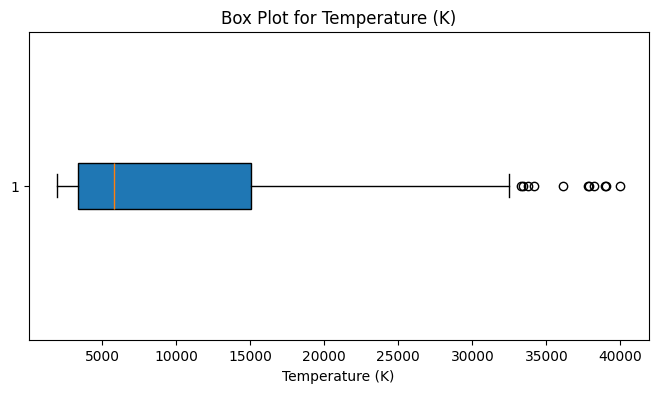

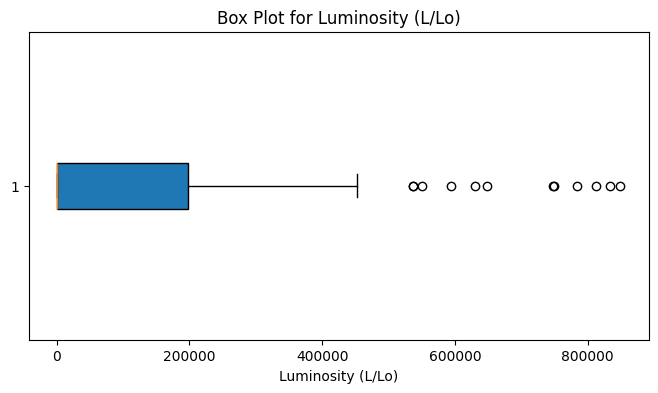

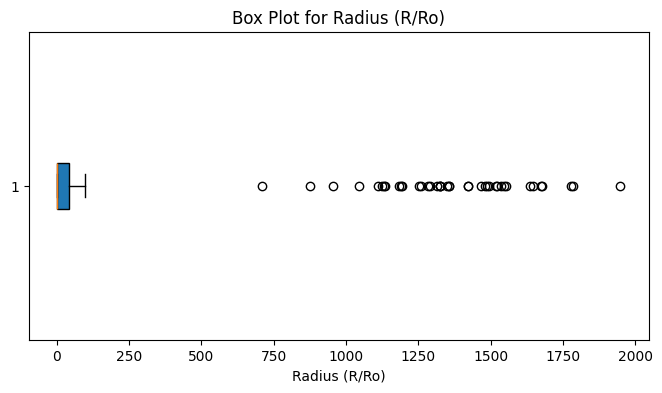

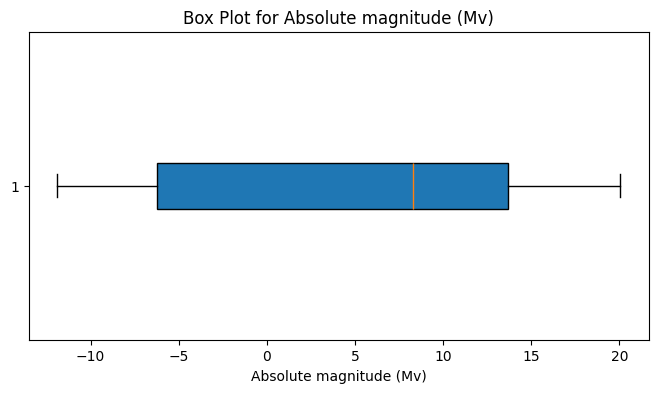

In [48]:
# Create box plots for each numeric column
numeric_columns = ['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)']

for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(star[column], vert=False, patch_artist=True)
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    plt.show()


In [49]:
# Define a function to calculate IQR and detect outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    print(f"{column}:")
    print(f"  Q1: {Q1}")
    print(f"  Q3: {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Number of outliers: {len(outliers)}")
    return outliers

# Columns to check for outliers
numeric_columns = ['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)']

# Loop through columns and detect outliers
for column in numeric_columns:
    outliers = detect_outliers_iqr(star, column)
    print(f"Outliers for {column}:")
    print(outliers)
    print("-" * 50)


Temperature (K):
  Q1: 3344.25
  Q3: 15055.5
  IQR: 11711.25
  Lower Bound: -14222.625
  Upper Bound: 32622.375
  Number of outliers: 11
Outliers for Temperature (K):
     Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  \
30             39000           204000.0          10.60   
49             33750           220000.0          26.00   
99             36108           198000.0          10.20   
100            33300           240000.0          12.00   
101            40000           813000.0          14.00   
109            33421           352000.0          67.00   
159            37800           202900.0           6.86   
214            34190           198200.0           6.39   
231            38234           272830.0        1356.00   
235            38940           374830.0        1356.00   
239            37882           294903.0        1783.00   

     Absolute magnitude (Mv)  Star type  Star category Star color  \
30                     -4.70          3  Main Sequence       Blue  

In [50]:
# Function to label outliers
def label_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Create a flag column
    data[f'{column}_is_outlier'] = (data[column] < lower_bound) | (data[column] > upper_bound)

# Apply the function to numeric columns
numeric_columns = ['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)']

for column in numeric_columns:
    label_outliers(star, column)

# Verify the new columns
outlier_summary = star[[f'{col}_is_outlier' for col in numeric_columns]].sum()
print("Outlier Summary:")
print(outlier_summary)


Outlier Summary:
Temperature (K)_is_outlier            11
Luminosity (L/Lo)_is_outlier          12
Radius (R/Ro)_is_outlier              40
Absolute magnitude (Mv)_is_outlier     0
dtype: int64


## Observations from the IQR Method:
### 1 Temperature (K): Outliers Detected: 11 rows.
- Characteristics: These outliers have very high temperatures, all above the upper bound of 32,622.375 K.
- Star Categories: Includes Main Sequence, Supergiants, and Hypergiants, which are valid star types with extreme temperatures.
#### 2 Luminosity (L/Lo): Outliers Detected: 12 rows.
- Characteristics: Extremely high luminosity values beyond 495,124.998.
- Star Categories: Primarily Hypergiants and Supergiants, which naturally exhibit high luminosity.
#### 3 Radius (R/Ro): Outliers Detected: 40 rows.
- Characteristics: Stars with very large radii beyond 106.720875.
- Star Categories: Most are Hypergiants, which are expected to have large radii.
#### 4 Absolute Magnitude (Mv):Outliers Detected: None.
- Reason: The data for absolute magnitude is well distributed, with no values falling outside the bounds.

### - <font color='#FF6347'>**I have decided to not remove the outliers because I do not think they are errors as they represent valid star types. I instead decided to label theses EDA**</font>  

# Step 3 : EDA

In [51]:
numerical_summary = star.describe()
numerical_summary

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [52]:
value_counts = star.value_counts()
value_counts

Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  Absolute magnitude (Mv)  Star type  Star category  Star color  Spectral Class  Temperature (K)_is_outlier  Luminosity (L/Lo)_is_outlier  Radius (R/Ro)_is_outlier  Absolute magnitude (Mv)_is_outlier
1939             0.000138           0.103           20.06                   0          Brown Dwarf    Red         M               False                       False                         False                     False                                 1
2600             0.000300           0.102           18.70                   0          Brown Dwarf    Red         M               False                       False                         False                     False                                 1
                 0.000400           0.096           17.40                   0          Brown Dwarf    Red         M               False                       False                         False                     False                        

## Observations:
Numerical Summary:

Count: All features have 240 rows, confirming no missing values.
Mean and Standard Deviation: Wide ranges for features like Temperature (K), Luminosity (L/Lo), and Radius (R/Ro) reflect the diversity in star types.
Min and Max: The large differences between the 25th and 75th percentiles (e.g., Luminosity spans from 0.000865 to 198,050) further indicate the presence of extreme values, which are expected given valid star types.
Star Type: Encoded from 0 to 5, corresponding to categories like Brown Dwarf and Hypergiant.
Value Counts:

Each row in the dataset is unique. This aligns with the fact that each star likely represents a unique set of characteristics.

### - <font color='#FF6347'>**I have decided to not remove the outliers because I do not think they are errors as they represent valid star types. I instead decided to label theses EDA**</font>  

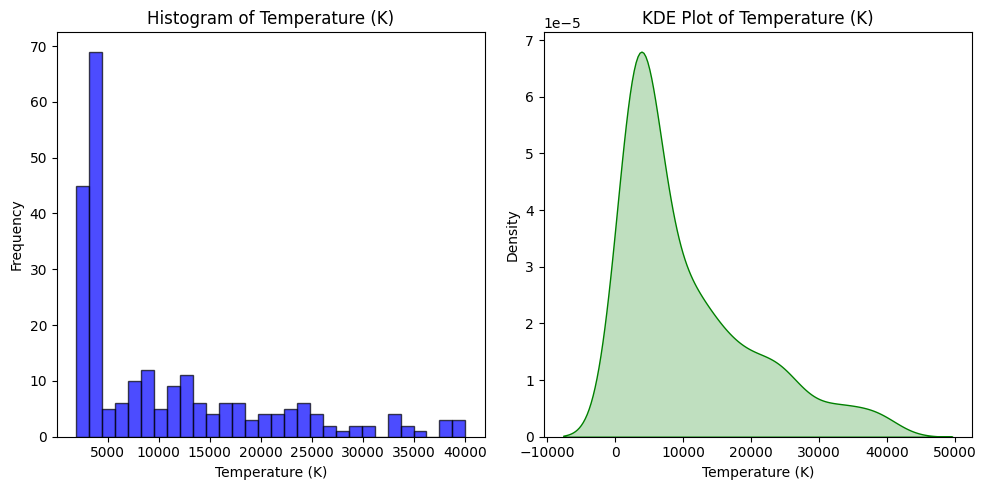

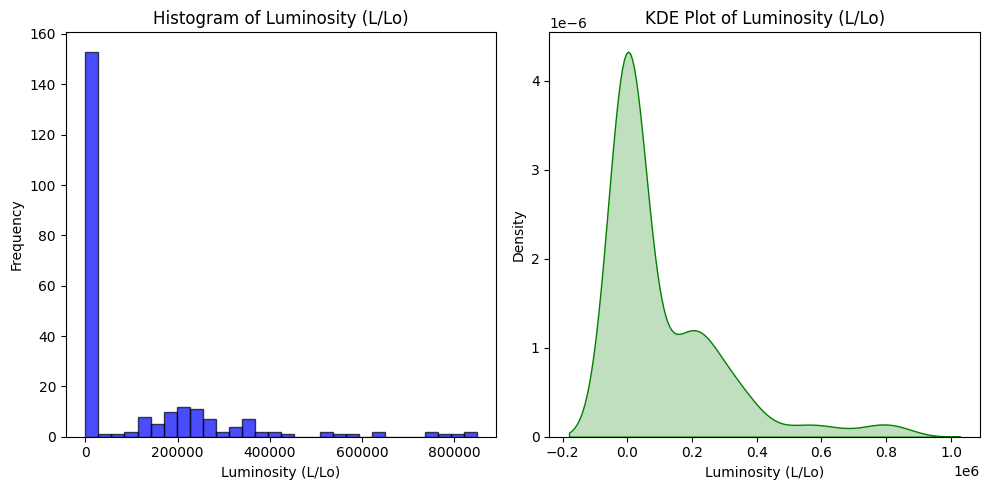

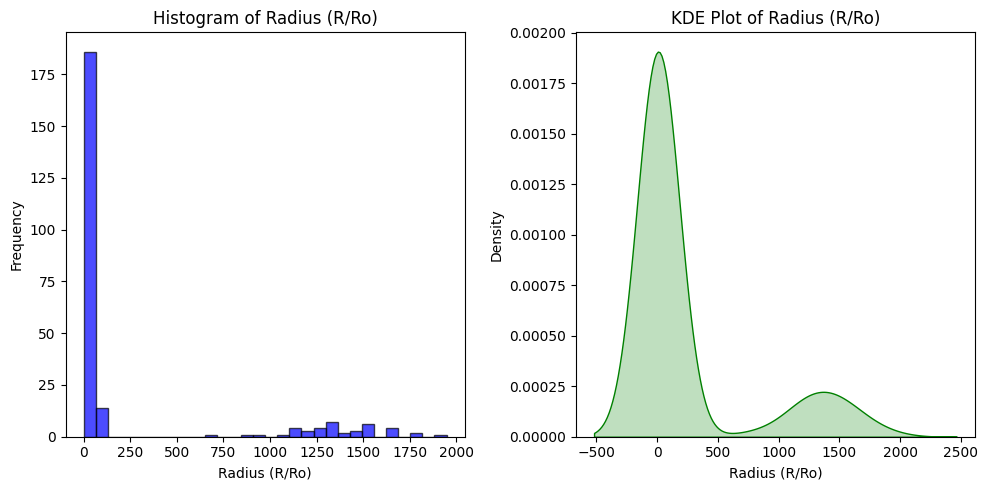

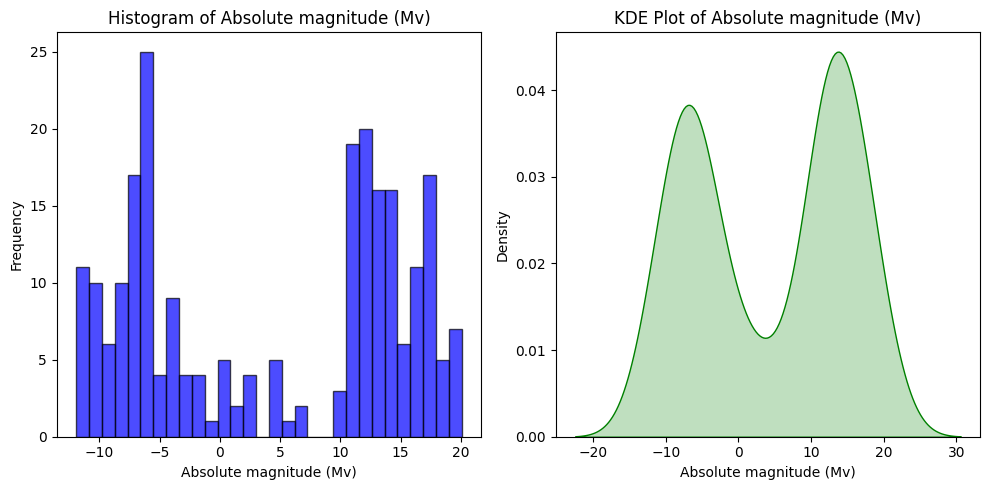

In [53]:
# List of numeric columns to visualize
numeric_columns = ['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)']

# Create histograms and KDE plots
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(star[column], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # KDE Plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(star[column], fill=True, color='green')
    plt.title(f'KDE Plot of {column}')
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()


## Observations from the Histograms and KDE Plots:
- Temperature (K): The distribution is highly right-skewed, with most stars having lower temperatures (around 5,000 K or less). A long tail extends toward higher temperatures, likely representing Supergiants and Hypergiants.
- Luminosity (L/Lo): Extremely right-skewed, with most stars having very low luminosities. The long tail reflects a small number of stars with extremely high luminosity (Hypergiants and Supergiants).
- Radius (R/Ro): Similar to Luminosity, it is right-skewed, with a cluster of stars having small radii. A second bump in the KDE plot suggests two distinct groups—likely small stars (e.g., Brown Dwarfs) and large stars (e.g., Hypergiants).
- Absolute Magnitude (Mv): The distribution is bi-modal, showing two distinct peaks. The negative values (brighter stars) and positive values (dimmer stars) indicate two major categories, such as bright Hypergiants and dim Brown Dwarfs.
- <font color='#FF6347'>**Skewed Distributions: Temperature, Luminosity, and Radius are all skewed due to the inclusion of extreme star types.**</font> 
- <font color='#FF6347'>**Distinct Groups: The bi-modal distribution in Absolute Magnitude and the second bump in Radius highlight clear separations between star categories.**</font> 

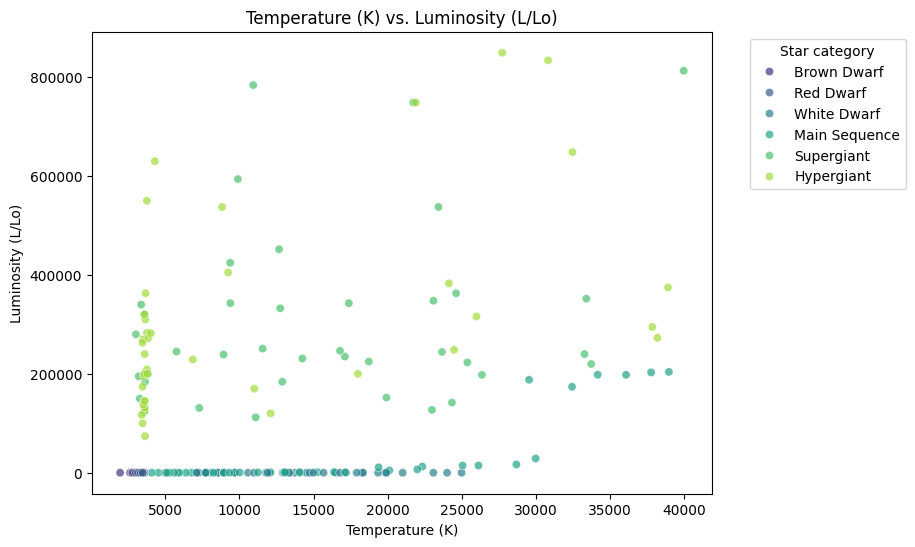

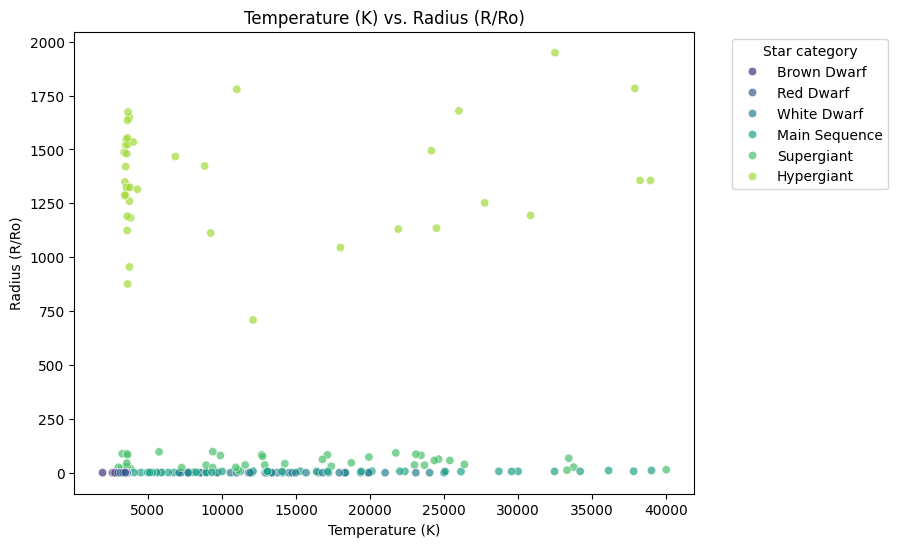

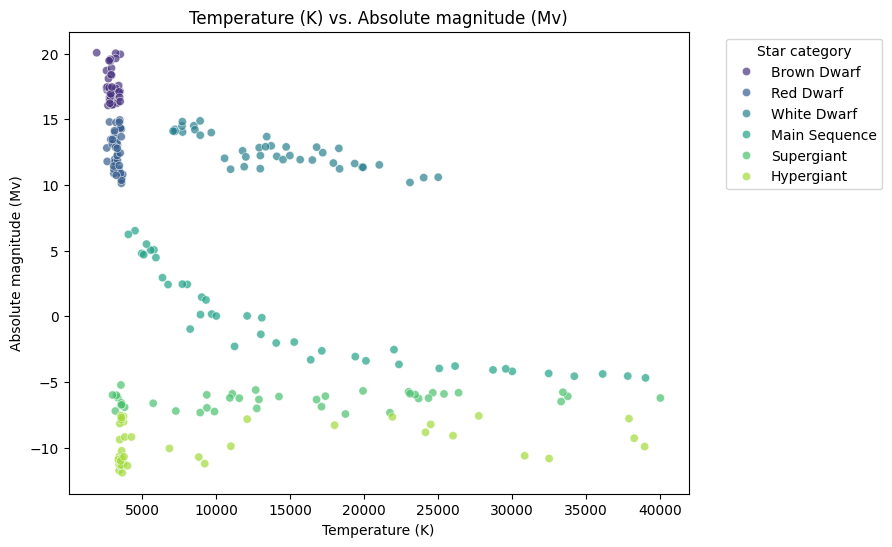

In [54]:
# Scatter plots for feature pairs
# Feature pairs to visualize
feature_pairs = [
    ('Temperature (K)', 'Luminosity (L/Lo)'),
    ('Temperature (K)', 'Radius (R/Ro)'),
    ('Temperature (K)', 'Absolute magnitude (Mv)'),
]

for x, y in feature_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=star, x=x, y=y, hue='Star category', palette='viridis', alpha=0.7)
    plt.title(f'{x} vs. {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title='Star category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


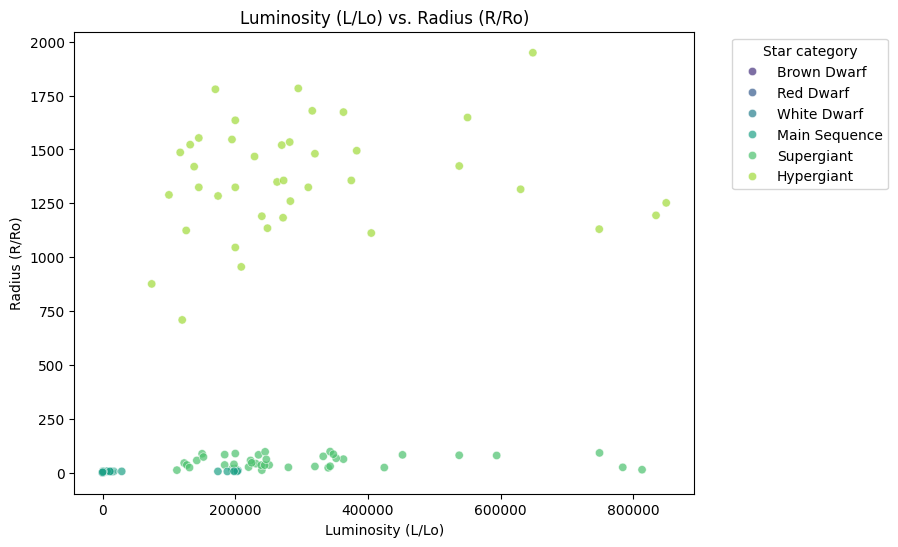

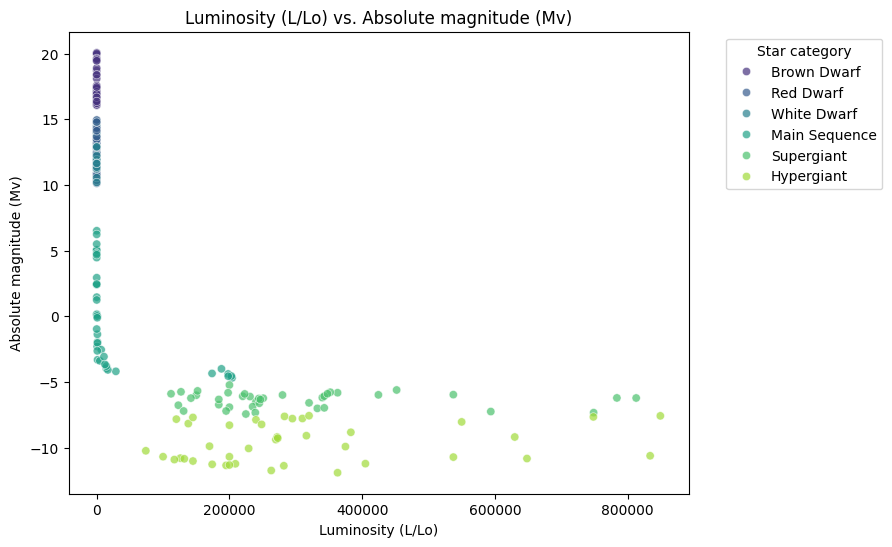

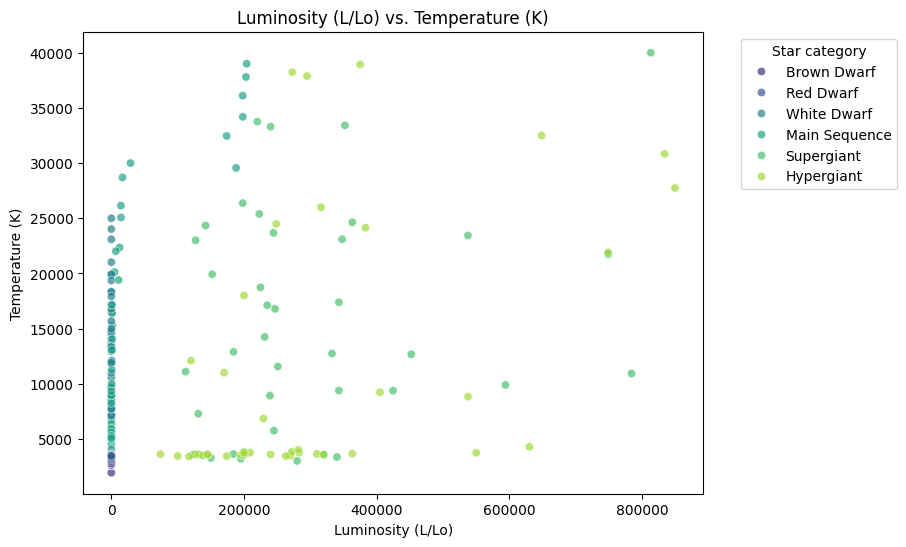

In [55]:
# Scatter plots for Luminosity vs other features
feature_pairs_luminosity = [
    ('Luminosity (L/Lo)', 'Radius (R/Ro)'),
    ('Luminosity (L/Lo)', 'Absolute magnitude (Mv)'),
    ('Luminosity (L/Lo)', 'Temperature (K)')
]

for x, y in feature_pairs_luminosity:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=star, x=x, y=y, hue='Star category', palette='viridis', alpha=0.7)
    plt.title(f'{x} vs. {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title='Star category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


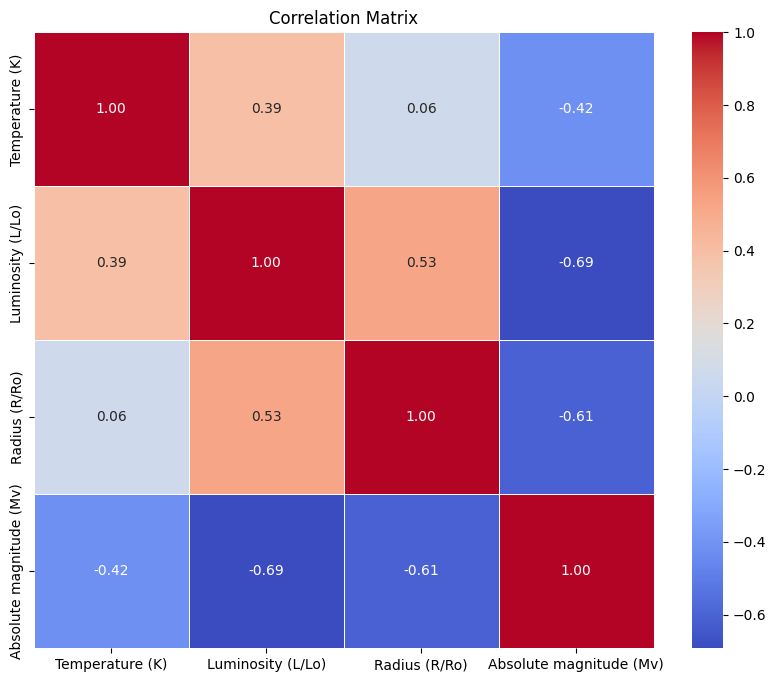

In [56]:
# Correlation matrix and heatmap
corr_matrix = star[['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Observations from the Scatter Plots:
### Temperature (K) vs. Luminosity (L/Lo):
- Clusters: There are distinct groups based on Star category.
- Trend: Stars with higher temperatures tend to have higher luminosities, as expected. Hypergiants and Supergiants dominate the high-luminosity regions.
### Temperature (K) vs. Radius (R/Ro):
- Clusters: A clear distinction between small-radius stars (e.g., Brown Dwarfs, White Dwarfs) and large-radius stars (Hypergiants).
- Trend: Higher temperatures generally do not correspond to larger radii, indicating unique properties of different star categories.
### Temperature (K) vs. Absolute Magnitude (Mv):
- Bi-modal Distribution: Brown Dwarfs and Red Dwarfs cluster at high Mv (dimmer stars), while Hypergiants and Supergiants cluster at lower Mv (brighter stars).
- Trend: Temperature strongly separates dim stars from bright stars, with a general negative correlation.
### Radius (R/Ro) vs. Luminosity (L/Lo):
- Clusters: Hypergiants dominate the upper-right region, with high luminosity and large radii. Smaller stars cluster near the origin.
- Trend: A positive correlation is observed, with larger-radius stars having higher luminosities.
### Luminosity vs. Radius:
- Clear: Hypergiants dominate the high-luminosity and large-radius region. Smaller stars (e.g., White Dwarfs and Brown Dwarfs) cluster near the origin with low luminosity and small radii.
Trend: A positive correlation exists, where larger stars tend to have higher luminosity.
### Luminosity vs. Absolute Magnitude:
- Inverse Relationship: As expected, brighter stars (lower absolute magnitude) have higher luminosity.
- Clear separation of star categories: Brown Dwarfs and Red Dwarfs cluster at high absolute magnitudes (dim stars). Hypergiants and Supergiants cluster at lower absolute magnitudes (bright stars).
### Luminosity vs. Temperature:
- Non-linear Trends: Higher luminosity generally corresponds to higher temperatures, but there is significant spread, especially for Hypergiants and Supergiants.
- Brown Dwarfs and Red Dwarfs dominate the low-luminosity and low-temperature region.

## Observations HeatMap: 
- Luminosity and Absolute Magnitude: The strongest correlation ( 𝑟 = − 0.69) suggests that luminosity could be a significant predictor for brightness (absolute magnitude).
- Temperature: While less strongly correlated with luminosity or radius, it remains an essential feature for classifying stars, especially when combined with luminosity.
- Feature Pairing: Combining Temperature and Luminosity likely provides the best separations across star categories, given their moderate correlations with other features.

# Step 4: Data Wrangling

### <font color='#FF6347'>**Normalizing Radius and Luminosity to handle their wide ranges during modeling. These large scales can overshadow other features when building models or visualizing data. Normalizing will allow features to be compared on the same scale, making scatter plots and clustering more meaningful.**</font> 

In [57]:
from sklearn.preprocessing import MinMaxScaler

# Normalize Radius and Luminosity using Min-Max Scaling
scaler = MinMaxScaler()
star[['Radius (R/Ro)', 'Luminosity (L/Lo)']] = scaler.fit_transform(star[['Radius (R/Ro)', 'Luminosity (L/Lo)']])

# Verify normalization
star[['Radius (R/Ro)', 'Luminosity (L/Lo)']].describe()


,Radius (R/Ro),Luminosity (L/Lo)
count,240.000000,2.400000e+02
mean,0.121709,1.261901e-01
std,0.265413,2.112409e-01
min,0.000000,0.000000e+00
25%,0.000048,9.238657e-10
50%,0.000387,8.290363e-08
75%,0.021936,2.331591e-01
max,1.000000,1.000000e+00


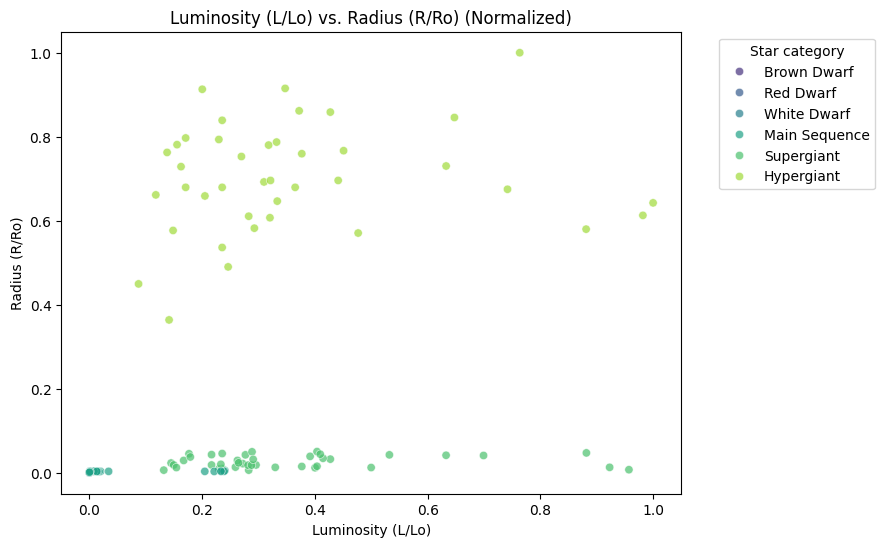

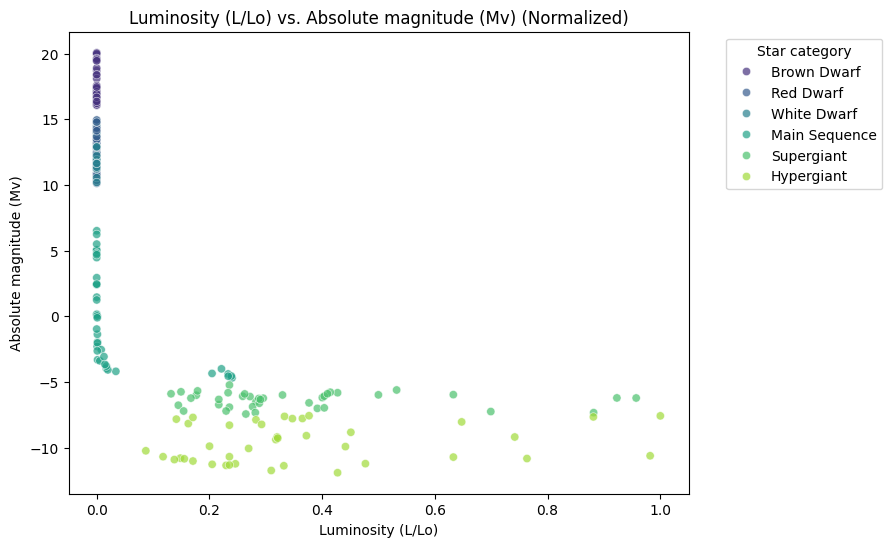

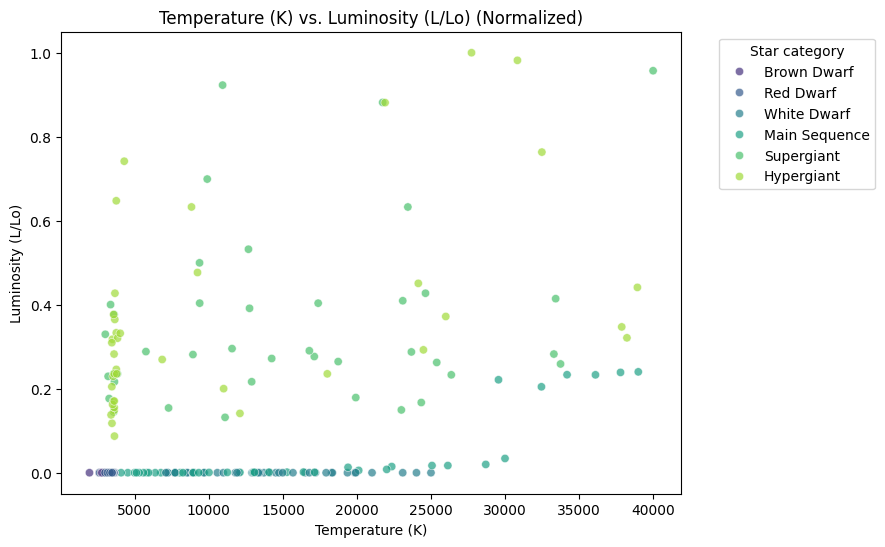

In [58]:
# Re-run scatter plots with normalized features
normalized_feature_pairs = [
    ('Luminosity (L/Lo)', 'Radius (R/Ro)'),
    ('Luminosity (L/Lo)', 'Absolute magnitude (Mv)'),
    ('Temperature (K)', 'Luminosity (L/Lo)')
]

for x, y in normalized_feature_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=star, x=x, y=y, hue='Star category', palette='viridis', alpha=0.7)
    plt.title(f'{x} vs. {y} (Normalized)')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title='Star category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


## Observations Post Normalization
### Improved Distribution Insight: 
- Luminosity (L/Lo) and Radius (R/Ro): Clearer distinction between Hypergiants and other categories. Hypergiants occupy the upper-right region, while smaller stars (like Brown Dwarfs and White Dwarfs) cluster near the origin.
- Luminosity (L/Lo) vs. Absolute Magnitude (Mv): A more apparent relationship: Bright stars (lower absolute magnitude) correlate strongly with high luminosity, reinforcing trends from earlier observations.
- Cluster Separation: Normalization enhances the visibility of clusters, particularly for extreme values like Hypergiants. Brown Dwarfs and Red Dwarfs remain concentrated in lower ranges, while Main Sequence stars spread over a wider range of luminosity and radius.
- Better Visualization: Scale differences no longer dominate, allowing relationships between features to be visualized uniformly across star categories.

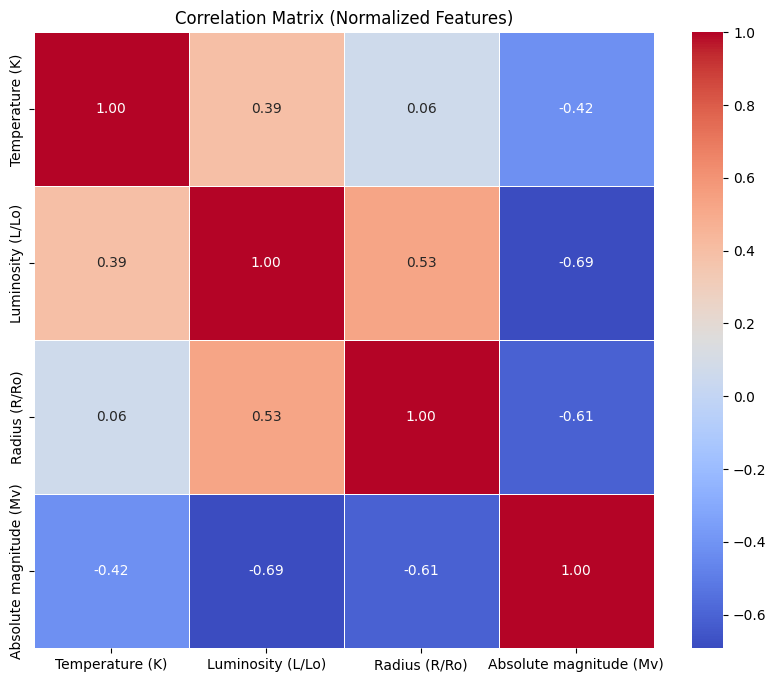

In [59]:
# Recompute the correlation matrix with normalized features
normalized_corr_matrix = star[['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(normalized_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Normalized Features)')
plt.show()


## Observations from the Heatmap (Normalized Features):
### Key Relationships Remain Intact: 
- Luminosity (L/Lo) shows a moderate positive correlation with Radius (R/Ro) (0.53).
- Strong negative correlation between Luminosity (L/Lo) and Absolute magnitude (Mv) (-0.69), reinforcing the idea that brighter stars have lower absolute magnitudes.
- Radius (R/Ro) and Absolute magnitude (Mv) also exhibit a significant negative correlation (-0.61), indicating larger stars are generally brighter.
### Temperature (K):
- Still has a weak correlation with Radius (R/Ro) (0.06), suggesting that temperature alone does not strongly define a star's size.
- Displays a moderate negative correlation with Absolute magnitude (Mv) (-0.42), indicating hotter stars tend to be brighter.
### Normalization Impact:
- The correlation values align closely with the non-normalized heatmap, confirming that normalization doesn’t distort relationships—it only scales values for uniform comparison.

## Encoding the categorical features
### Label Encoding for 'Star category': Transforms categories like 'Brown Dwarf' → 0, 'Red Dwarf' → 1, and so on, into integers.
### One-Hot Encoding for 'Star color' and 'Spectral Class': Converts these categorical variables into multiple binary columns, each representing whether a specific category is present (e.g., Star color_Blue White = 1 if the star is blue-white).

In [60]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'Star category'
label_encoder = LabelEncoder()
star['Star category'] = label_encoder.fit_transform(star['Star category'])

# One-Hot Encoding for 'Star color' and 'Spectral Class'
star = pd.get_dummies(star, columns=['Star color', 'Spectral Class'], drop_first=True)

# Display the updated DataFrame
print(star.head())


   Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  Absolute magnitude (Mv)  \
0             3068       2.731275e-09       0.000083                    16.12   
1             3042       4.944550e-10       0.000075                    16.60   
2             2600       2.590003e-10       0.000048                    18.70   
3             2800       1.412729e-10       0.000078                    16.65   
4             1939       6.828189e-11       0.000049                    20.06   

   Star type  Star category  Temperature (K)_is_outlier  \
0          0              0                       False   
1          0              0                       False   
2          0              0                       False   
3          0              0                       False   
4          0              0                       False   

   Luminosity (L/Lo)_is_outlier  Radius (R/Ro)_is_outlier  \
0                         False                     False   
1                         False     

In [61]:
star.head(15)

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Temperature (K)_is_outlier,Luminosity (L/Lo)_is_outlier,Radius (R/Ro)_is_outlier,Absolute magnitude (Mv)_is_outlier,...,Star color_Whitish,Star color_Yellow White,Star color_Yellowish,Star color_Yellowish White,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
0,3068,2.731275e-09,0.000083,16.120,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,3042,4.944550e-10,0.000075,16.600,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2600,2.590003e-10,0.000048,18.700,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2800,1.412729e-10,0.000078,16.650,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1939,6.828189e-11,0.000049,20.060,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,2840,6.710461e-10,0.000052,16.980,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,2637,7.652280e-10,0.000061,17.220,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,2600,3.767276e-10,0.000045,17.400,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
8,2650,7.181371e-10,0.000052,17.450,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9,2700,1.177274e-10,0.000062,16.050,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


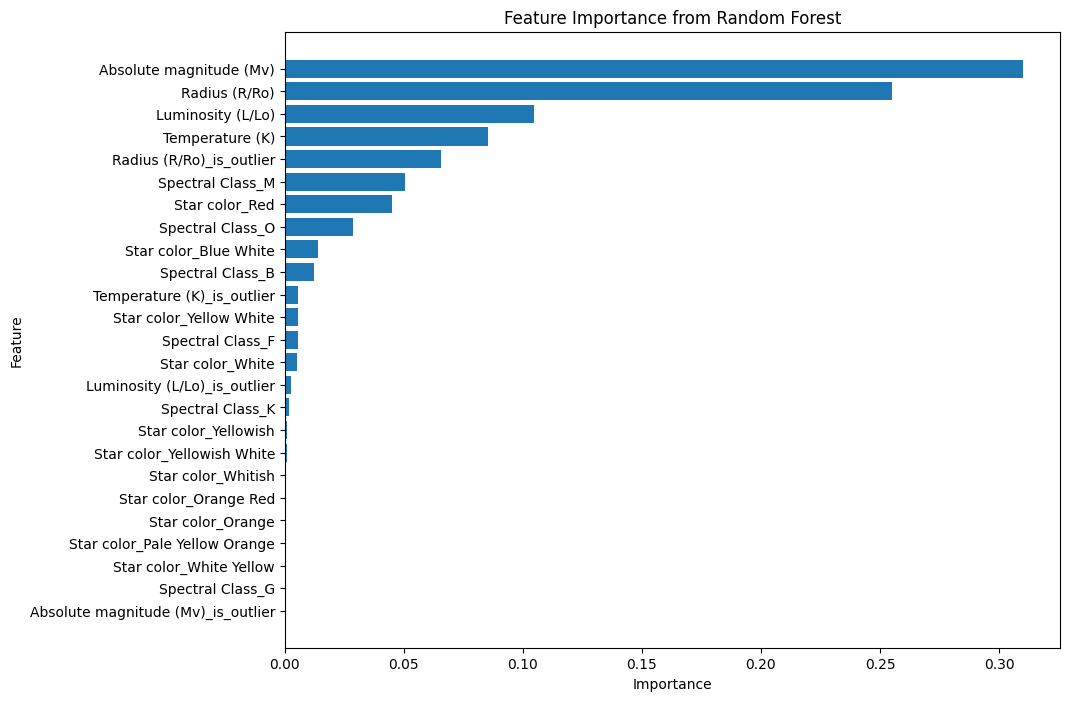

                               Feature  Importance
3              Absolute magnitude (Mv)    0.310022
2                        Radius (R/Ro)    0.254932
1                    Luminosity (L/Lo)    0.104486
0                      Temperature (K)    0.085482
6             Radius (R/Ro)_is_outlier    0.065812
23                    Spectral Class_M    0.050593
12                      Star color_Red    0.044897
24                    Spectral Class_O    0.028837
8                Star color_Blue White    0.013794
19                    Spectral Class_B    0.012079
4           Temperature (K)_is_outlier    0.005667
16             Star color_Yellow White    0.005608
20                    Spectral Class_F    0.005576
13                    Star color_White    0.005280
5         Luminosity (L/Lo)_is_outlier    0.002414
22                    Spectral Class_K    0.001572
17                Star color_Yellowish    0.001031
18          Star color_Yellowish White    0.000724
15                  Star color_

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define X and y
X = star.drop(['Star type', 'Star category'], axis=1)  # Exclude target variables
y = star['Star category']  # Target variable

# Fit a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Display sorted feature importances
print(feature_importances)


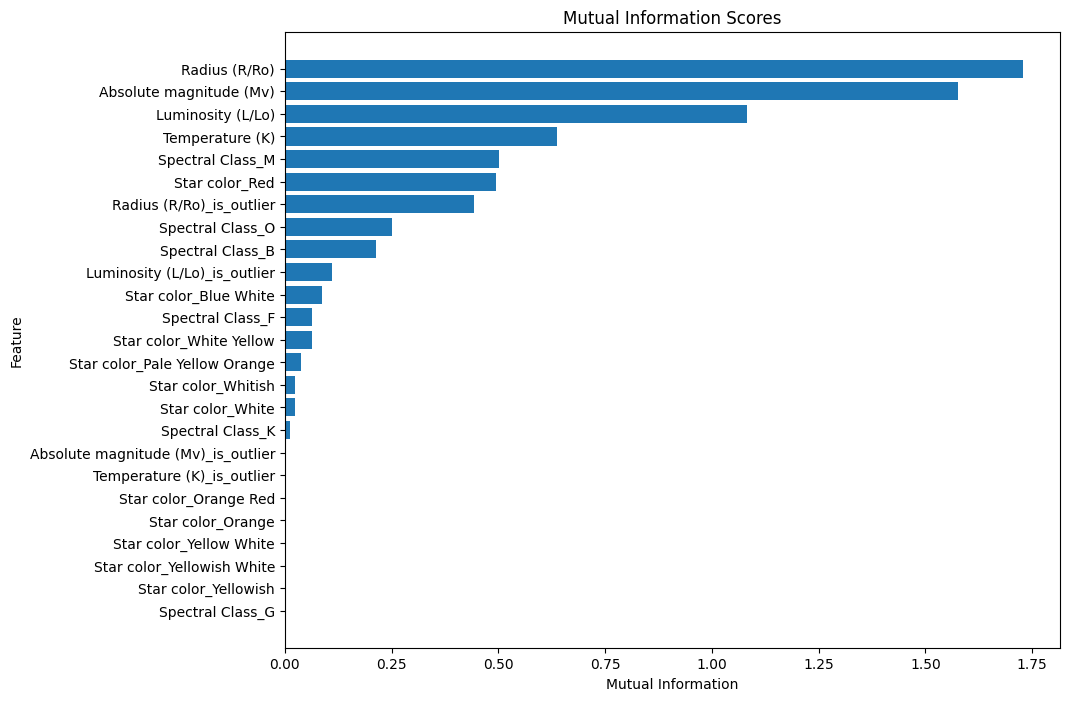

                               Feature  Mutual Information
2                        Radius (R/Ro)            1.728404
3              Absolute magnitude (Mv)            1.577009
1                    Luminosity (L/Lo)            1.083489
0                      Temperature (K)            0.637793
23                    Spectral Class_M            0.501180
12                      Star color_Red            0.494063
6             Radius (R/Ro)_is_outlier            0.443655
24                    Spectral Class_O            0.251336
19                    Spectral Class_B            0.213100
5         Luminosity (L/Lo)_is_outlier            0.111063
8                Star color_Blue White            0.086047
20                    Spectral Class_F            0.064433
14             Star color_White Yellow            0.064430
11       Star color_Pale Yellow Orange            0.038994
15                  Star color_Whitish            0.024980
13                    Star color_White            0.0233

In [63]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information
mutual_info = mutual_info_classif(X, y, random_state=42)

# Create a DataFrame for mutual information
mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
}).sort_values(by='Mutual Information', ascending=False)

# Plot mutual information scores
plt.figure(figsize=(10, 8))
plt.barh(mutual_info_df['Feature'], mutual_info_df['Mutual Information'])
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.title('Mutual Information Scores')
plt.gca().invert_yaxis()
plt.show()

# Display sorted mutual information scores
print(mutual_info_df)


## Observation
- Tree-Based Feature Importance: Shows that Absolute Magnitude (Mv), Radius (R/Ro), and Luminosity (L/Lo) are the most influential features in predicting the target variable. Spectral classes and specific star colors, while less critical, still provide some predictive value.
- Mutual Information: Suggests a similar ranking but emphasizes Radius (R/Ro) as the top contributor, followed by Absolute Magnitude (Mv) and Luminosity (L/Lo). Shows a strong dependency between some categorical features and the target variable.
- Key Takeaways: Both methods consistently highlight Radius (R/Ro), Luminosity (L/Lo), and Absolute Magnitude (Mv) as highly relevant features. Additional insights from spectral classes and star colors can help refine predictions.

# Step 5 : Building Classification Model

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Splitting the data
X = star.drop(columns=['Star category', 'Star type'])  # Features
y = star['Star category']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Selecting and training the model (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Analyzing the results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         6

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48


Confusion Matrix:
[[ 8  0  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0  7  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0  6]]


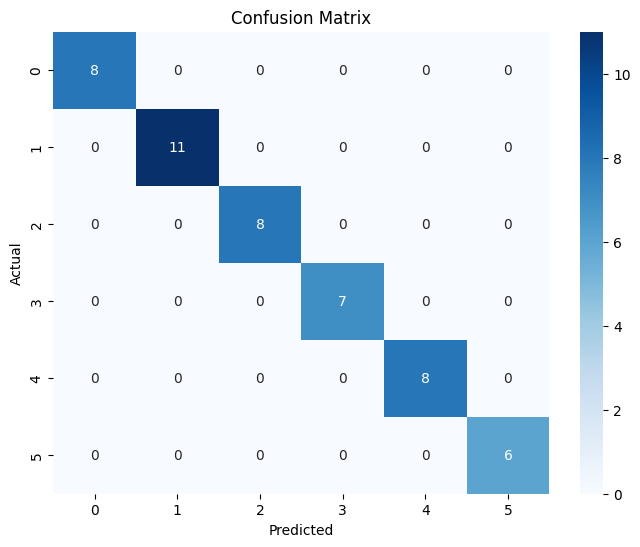

In [65]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


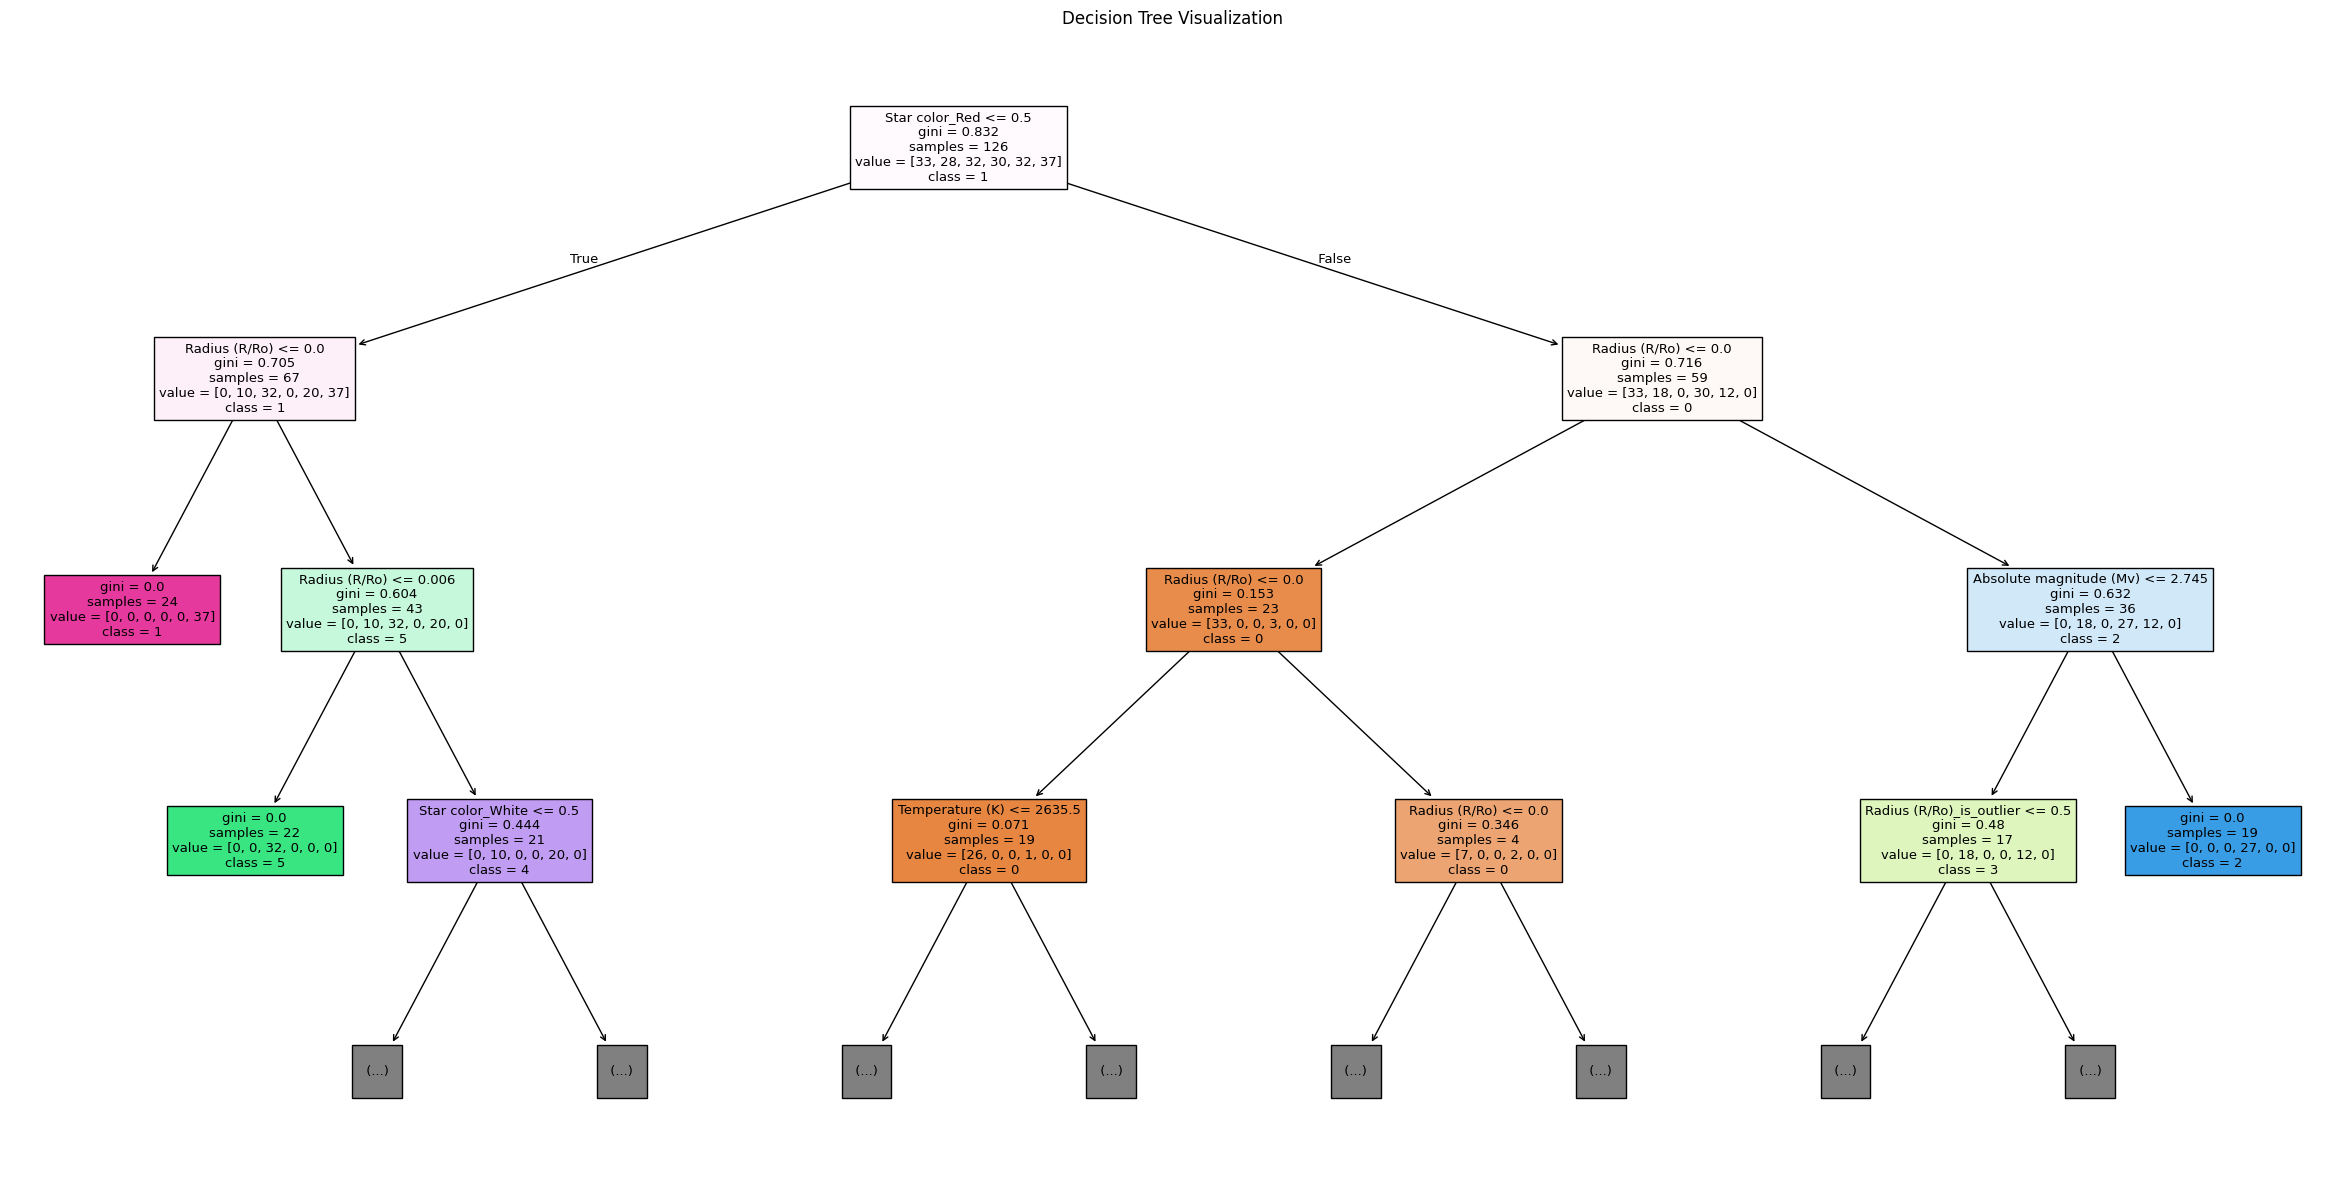

In [66]:
from sklearn.tree import plot_tree

# Visualize a single decision tree from the Random Forest
plt.figure(figsize=(30, 15))
plot_tree(model.estimators_[0], feature_names=X.columns, class_names=y.unique().astype(str), filled=True, max_depth=3)
plt.title("Decision Tree Visualization")
plt.show()


# Step 6: Evaluating the Model

In [67]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print average cross-validation accuracy
print("Cross-Validation Accuracy: {:.2f}%".format(cv_scores.mean() * 100))


Cross-Validation Accuracy: 99.58%


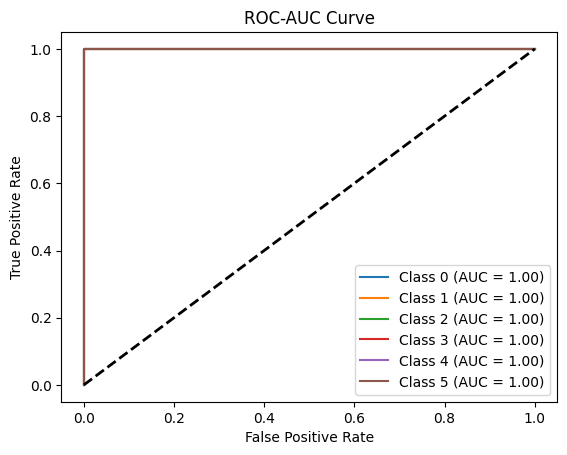

In [68]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Binarize the target variable for multiclass
y_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
n_classes = y_bin.shape[1]

# Predict probabilities
y_prob = model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Class {} (AUC = {:.2f})'.format(i, roc_auc))

# Plot the curve
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()


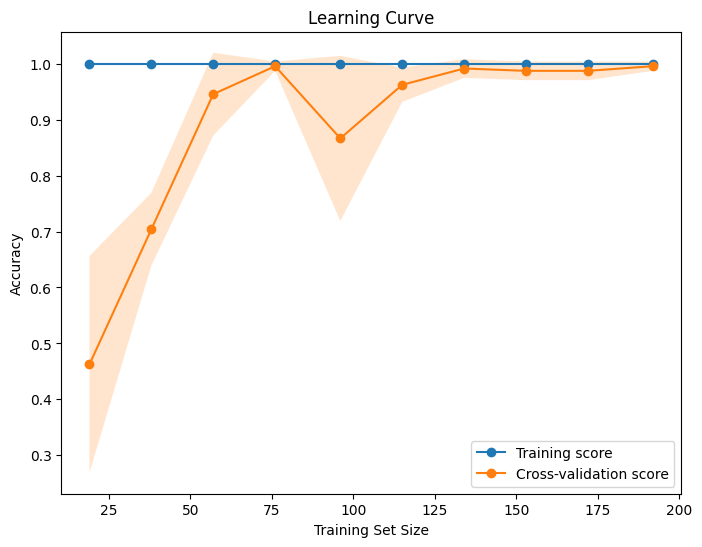

In [69]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_mean, 'o-', label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.show()


In [70]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform K-Fold Cross-Validation (let's use 10 folds as an example)
k = 10
cv_scores = cross_val_score(rf_model, X, y, cv=k, scoring='accuracy')

# Display the results
print(f"K-Fold Cross-Validation Results ({k} folds):")
print(f"Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

K-Fold Cross-Validation Results (10 folds):
Accuracy Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Accuracy: 1.0000
Standard Deviation: 0.0000


In [71]:
cv_precision = cross_val_score(rf_model, X, y, cv=k, scoring='precision_macro')
cv_recall = cross_val_score(rf_model, X, y, cv=k, scoring='recall_macro')
cv_f1 = cross_val_score(rf_model, X, y, cv=k, scoring='f1_macro')

print(f"Precision: {np.mean(cv_precision):.4f}")
print(f"Recall: {np.mean(cv_recall):.4f}")
print(f"F1 Score: {np.mean(cv_f1):.4f}")


Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


## Observations:
- ROC-AUC Curve: Each class achieves an AUC of 1.0, indicating perfect classification performance without any overlap in decision boundaries.
- Learning Curve: The training score consistently reaches 100%, and the cross-validation score stabilizes near 99%, showcasing the model's ability to generalize well with minimal overfitting.
- Cross-Validation Accuracy: A score of 99.58% confirms the model's robustness across multiple data splits.
- These results imply that the model handles this dataset effectively, leveraging the features to distinguish between star categories accurately.

# Challenges Encountered
- Feature Complexity: The dataset included a mix of numerical and categorical variables (e.g., "Star Color," "Spectral Class"), which required careful preprocessing and encoding.
- Outliers: Certain values, such as those for Hypergiants and Supergiants, appeared as outliers but were valid data points. The challenge was to include them without compromising model performance.
- mClass Imbalance: While not severe, some star categories (e.g., Hypergiants) had fewer samples. This could have led to biased predictions if not properly handled.
- Model Overfitting: The Random Forest model achieved perfect accuracy, raising concerns about overfitting. However, cross-validation confirmed its robustness.
- Feature Selection: Determining the most relevant features required experimenting with various techniques (tree-based importance, mutual information, RFE). Some methods yielded redundant or non-intuitive results.

# What Else Can Be Done to Improve the Model?
- Hyperparameter Optimization: Further tune the Random Forest model using techniques like Grid Search or Bayesian Optimization to explore parameters like n_estimators, max_depth, or min_samples_split.
- Collaborate with astrophysicists to create domain-specific features (e.g., luminosity-radius ratios, spectral indices) that might improve classification.